#  Scatter plots with matplotlib

# Scatter plots

**Purpose**: Displaying relationships between variables.

**matplotlib function**: [`scatter(x, y)`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)

* `x`, `y`: The values for the two variables.

In [110]:
import pandas as pd

import matplotlib.pyplot as plt


In [111]:
iris = pd.read_csv("data/iris_csv.csv") 

Data analysis: 4 ordinal attributes (flowers characteristics), one categorical feature (flower class)

In [112]:
print(iris)



     sepallength  sepalwidth  petallength  petalwidth           class
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]


Our first plot

<AxesSubplot:xlabel='sepallength', ylabel='sepalwidth'>

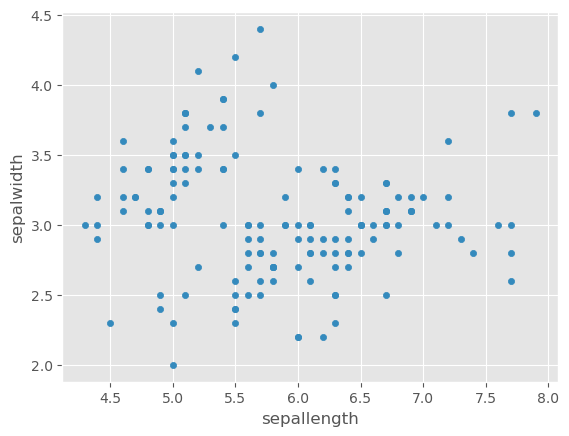

In [113]:
iris.plot(kind="scatter", x="sepallength", y="sepalwidth")
#pandas has integrated plotting functions based on matplotlib. We can use the object function!

Here we use object oriented stateless plotting and multiple scatterplots, change mark size. Colors are changed sequentially by default!

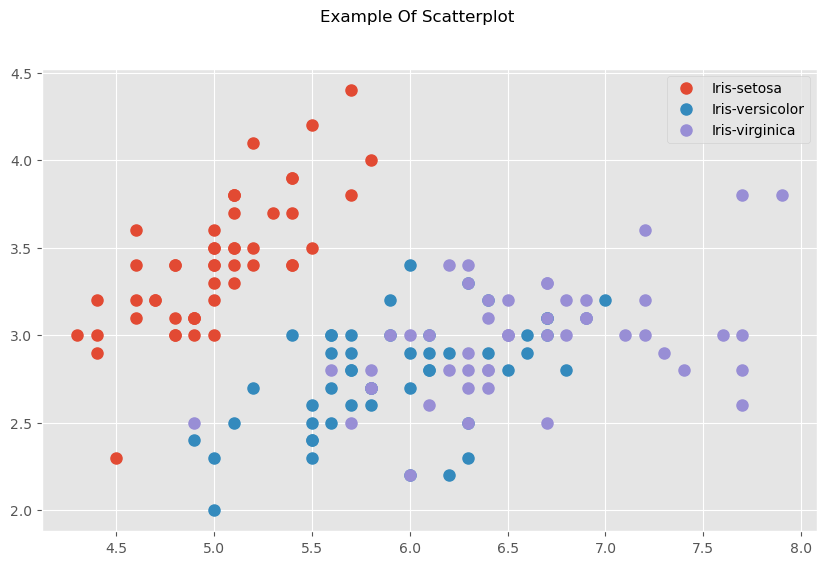

In [137]:
groups=iris.groupby("class");
labcount=groups.size()
s=labcount.size;
fig, ax = plt.subplots(1, figsize=(10, 6)) #set size of the image
fig.suptitle('Example Of Scatterplot')

for name, group in groups:
    ax.plot(group.sepallength, group.sepalwidth, marker='o', linestyle='', ms=8, label=name)
ax.legend()

#loops. automatically set colors according to sequence

We don't need to iterate to separate classes

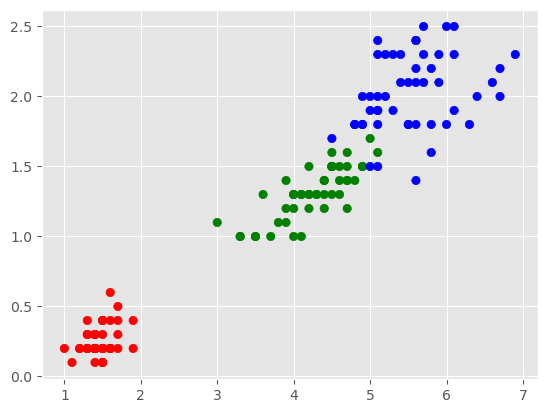

In [140]:
fig, ax = plt.subplots()
colors = {'Iris-setosa':'red', 'Iris-versicolor':'green', 'Iris-virginica':'blue'}
ax.scatter(iris['petallength'], iris['petalwidth'],c=iris['class'].map(colors))
ax.grid(True)
plt.show()

Let's check the data

In [115]:
#number of items per flower class
print(labcount)
labcount.to_dict()


class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


{'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50}

In [116]:
minVal = iris.min()
print(minVal)
maxVal = iris.max()
print(maxVal)
colors=iris

sepallength            4.3
sepalwidth             2.0
petallength            1.0
petalwidth             0.1
class          Iris-setosa
dtype: object
sepallength               7.9
sepalwidth                4.4
petallength               6.9
petalwidth                2.5
class          Iris-virginica
dtype: object


Can we map other values on the scatterplot? Yes, we have size and colors, for example!
Need to rescale to have reasonable sizes, and reasonable color mapping
Consider minimum an maximum value of the attribute and the reasonable range for size. And use a good colormap for color!

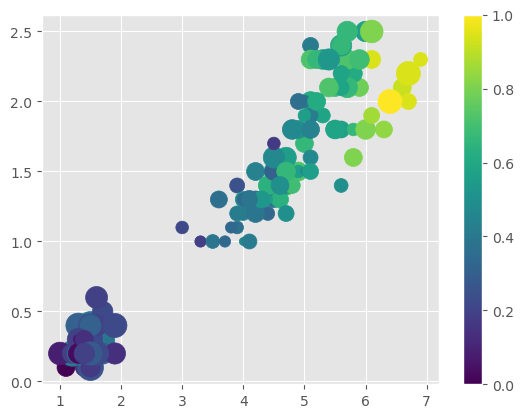

In [141]:
fig, ax = plt.subplots()
cols= (iris['sepallength']-minVal['sepallength'])/(maxVal['sepallength']-minVal['sepallength'])
dime= 400*(iris['sepalwidth']-minVal['sepalwidth'])/(maxVal['sepalwidth']-minVal['sepalwidth'])
ax.scatter(iris['petallength'], iris['petalwidth'],dime,cols, cmap='viridis')
sm = plt.cm.ScalarMappable( cmap='viridis', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm)
ax.grid(True)
plt.show()

In [119]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

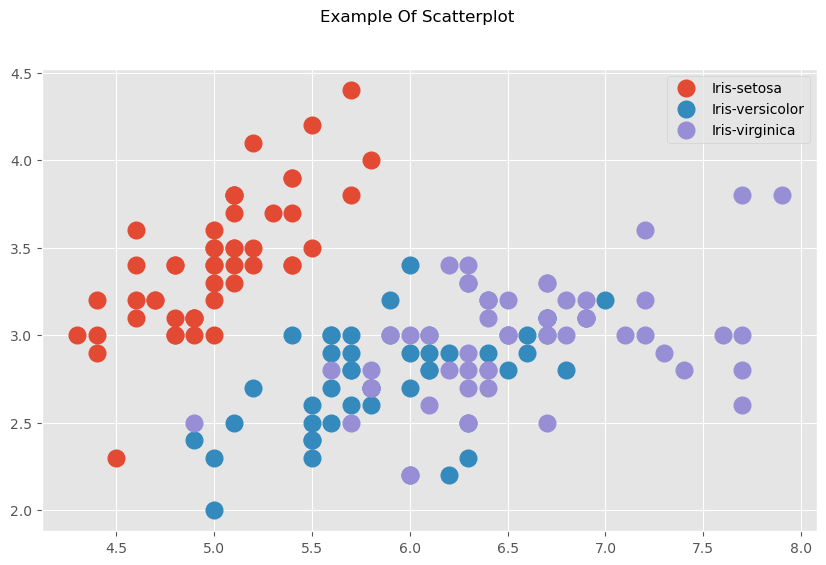

In [120]:
plt.style.use('ggplot')
groups=iris.groupby("class");
labcount=groups.size()
s=labcount.size;
fig, ax = plt.subplots(1, figsize=(10, 6)) #set size of the image
fig.suptitle('Example Of Scatterplot')

for name, group in groups:
    ax.plot(group.sepallength, group.sepalwidth, marker='o', linestyle='', ms=12, label=name)
ax.legend()



<h1>Dimensionality reduction </h1>

variables need to be scaled to have the same range otherwise the attribute with largest variation will be more important

In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE


variables = ['sepallength', 'sepalwidth','petallength','petalwidth']
x = iris.loc[:, variables].values
y = iris.loc[:,['class']].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)

In [147]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3
0,-2.264542,0.505704,-0.121943,-0.023073
1,-2.086426,-0.655405,-0.227251,-0.103208
2,-2.367950,-0.318477,0.051480,-0.027825
3,-2.304197,-0.575368,0.098860,0.066311
4,-2.388777,0.674767,0.021428,0.037397


In [130]:
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [131]:
x_pca['class']=y
x_pca.columns = ['PC1','PC2','PC3','PC4','class']
x_pca.head()

,PC1,PC2,PC3,PC4,class
0,-2.264542,0.505704,-0.121943,-0.023073,Iris-setosa
1,-2.086426,-0.655405,-0.227251,-0.103208,Iris-setosa
2,-2.367950,-0.318477,0.051480,-0.027825,Iris-setosa
3,-2.304197,-0.575368,0.098860,0.066311,Iris-setosa
4,-2.388777,0.674767,0.021428,0.037397,Iris-setosa


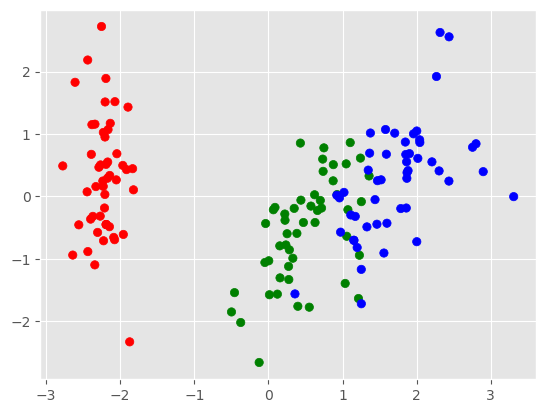

In [132]:
fig, ax = plt.subplots()
colors = {'Iris-setosa':'red', 'Iris-versicolor':'green', 'Iris-virginica':'blue'}
ax.scatter(x_pca['PC1'], x_pca['PC2'],c=x_pca['class'].map(colors))

ax.grid(True)
plt.show()

In [135]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(x, y)
x_lda = lda.transform(x)
x_lda = pd.DataFrame(x_lda)
x_lda['class']=y
x_lda.columns = ['a','b','class']
x_lda.head()
explained_variance = lda.explained_variance_ratio_
explained_variance

C:\Users\Utente\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.99147248, 0.00852752])

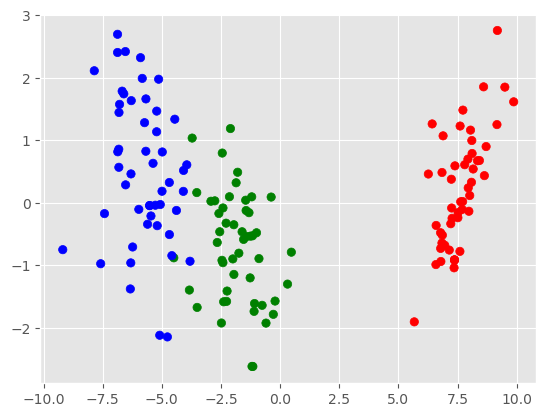

In [134]:
fig, ax = plt.subplots()
colors = {'Iris-setosa':'red', 'Iris-versicolor':'green', 'Iris-virginica':'blue'}
ax.scatter(x_lda['a'], x_lda['b'],c=x_lda['class'].map(colors))
ax.grid(True)
plt.show()

T-SNE is not deterministic. Try to repeat

In [158]:
x_tsne = TSNE(n_components=2, n_iter=1000).fit_transform(x)

C:\Users\Utente\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Utente\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [159]:
x_tsne = pd.DataFrame(x_tsne)
x_tsne['class']=y
x_tsne.columns = ['a','b','class']
x_tsne.head()


,a,b,class
0,13.996504,16.468224,Iris-setosa
1,10.396775,15.069094,Iris-setosa
2,11.795503,14.859501,Iris-setosa
3,11.199379,14.379185,Iris-setosa
4,14.213217,17.141972,Iris-setosa


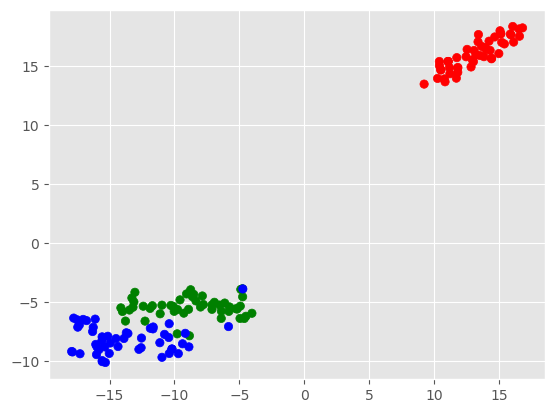

In [160]:
fig, ax = plt.subplots()
colors = {'Iris-setosa':'red', 'Iris-versicolor':'green', 'Iris-virginica':'blue'}
ax.scatter(x_tsne['a'], x_tsne['b'],c=x_tsne['class'].map(colors))
ax.grid(True)
plt.show()